In [13]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import pandas as pd
import os
import sys
import time
from tensorflow import keras
print(sys.version_info)
for module in mpl,np,pd,tf,keras:
    print(module.__name__,module.__version__)

sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.16.5
pandas 0.25.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


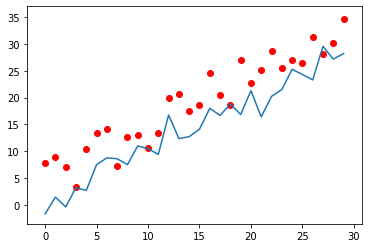

In [70]:
import random
x=list(range(0,30))
y=x+np.random.randn(30)*2
plt.plot(x,y)
class test:
    x=[]
    y=[]
    for i in range(30):
        x.append(i)
        y.append(i+random.random()*10)
plt.scatter(test.x,test.y,c="r")

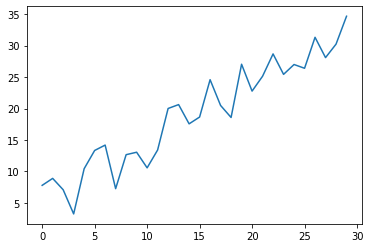

In [89]:
plt.plot(test.y)

In [82]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(1, input_shape=(1,)))
model.summary()
model.compile(optimizer='adam', loss='mse')
history=model.fit(test.x,test.y,epochs=100)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 30 samples
Epoch 1/100
30/30 [==============================] - 1s 40ms/sample - loss: 164.4712
Epoch 2/100
30/30 [==============================] - 0s 1ms/sample - loss: 164.0354
Epoch 3/100
30/30 [==============================] - 0s 1ms/sample - loss: 163.6002
Epoch 4/100
30/30 [==============================] - 0s 1ms/sample - loss: 163.1656
Epoch 5/100
30/30 [==============================] - 0s 1ms/sample - loss: 162.7317
Epoch 6/100
30/30 [==============================] - 0s 1ms/sample - loss: 162.2986
Epoch 7/100
30/30 [==============================] - 0s 1ms/sample - loss: 161.8660
Epoch 8/100
30/30 [=========================

Epoch 92/100
30/30 [==============================] - 0s 972us/sample - loss: 128.1627
Epoch 93/100
30/30 [==============================] - 0s 1ms/sample - loss: 127.8036
Epoch 94/100
30/30 [==============================] - 0s 1ms/sample - loss: 127.4454
Epoch 95/100
30/30 [==============================] - 0s 965us/sample - loss: 127.0880
Epoch 96/100
30/30 [==============================] - 0s 997us/sample - loss: 126.7315
Epoch 97/100
30/30 [==============================] - 0s 999us/sample - loss: 126.3759
Epoch 98/100
30/30 [==============================] - 0s 1ms/sample - loss: 126.0210
Epoch 99/100
30/30 [==============================] - 0s 996us/sample - loss: 125.6671
Epoch 100/100
30/30 [==============================] - 0s 996us/sample - loss: 125.3140


In [81]:
model.predict(x)

array([[  0.09913673],
       [ -0.61834264],
       [ -1.335822  ],
       [ -2.0533013 ],
       [ -2.7707806 ],
       [ -3.4882598 ],
       [ -4.2057395 ],
       [ -4.9232187 ],
       [ -5.640698  ],
       [ -6.358177  ],
       [ -7.0756564 ],
       [ -7.793136  ],
       [ -8.510616  ],
       [ -9.228095  ],
       [ -9.945575  ],
       [-10.6630535 ],
       [-11.380533  ],
       [-12.098013  ],
       [-12.815492  ],
       [-13.532971  ],
       [-14.25045   ],
       [-14.96793   ],
       [-15.68541   ],
       [-16.40289   ],
       [-17.120369  ],
       [-17.837847  ],
       [-18.555326  ],
       [-19.272806  ],
       [-19.990286  ],
       [-20.707766  ]], dtype=float32)

In [32]:
import tensorflow as tf
import numpy as np

# 一些参数
learning_rate = 0.01  # 学习率
training_steps = 1000  # 训练次数
display_step = 50  # 训练50次输出一次

# 训练数据
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

# 随机初始化权重和偏置
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# 线性回归函数
def linear_regression(x):
    return W*x + b

# 损失函数
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

# 优化器采用随机梯度下降(SGD)
optimizer = tf.optimizers.SGD(learning_rate)

# 计算梯度，更新参数
def run_optimization():
    # tf.GradientTape()梯度带，可以查看每一次epoch的参数值
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
    # 计算梯度
    gradients = g.gradient(loss, [W, b])
    # 更新W，b
    optimizer.apply_gradients(zip(gradients, [W, b]))

# 开始训练
for step in range(1, training_steps+1):
    run_optimization()
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.078593, W: 0.274762, b: 0.634839
step: 100, loss: 0.078403, W: 0.273399, b: 0.644500
step: 150, loss: 0.078234, W: 0.272117, b: 0.653592
step: 200, loss: 0.078085, W: 0.270910, b: 0.662148
step: 250, loss: 0.077953, W: 0.269775, b: 0.670200
step: 300, loss: 0.077835, W: 0.268706, b: 0.677777
step: 350, loss: 0.077732, W: 0.267700, b: 0.684908
step: 400, loss: 0.077640, W: 0.266753, b: 0.691619
step: 450, loss: 0.077559, W: 0.265862, b: 0.697934
step: 500, loss: 0.077487, W: 0.265024, b: 0.703878
step: 550, loss: 0.077423, W: 0.264235, b: 0.709471
step: 600, loss: 0.077366, W: 0.263493, b: 0.714734
step: 650, loss: 0.077316, W: 0.262794, b: 0.719688
step: 700, loss: 0.077272, W: 0.262137, b: 0.724349
step: 750, loss: 0.077233, W: 0.261518, b: 0.728736
step: 800, loss: 0.077198, W: 0.260936, b: 0.732864
step: 850, loss: 0.077167, W: 0.260388, b: 0.736749
step: 900, loss: 0.077140, W: 0.259872, b: 0.740405
step: 950, loss: 0.077116, W: 0.259387, b: 0.743846
step: 1000, l

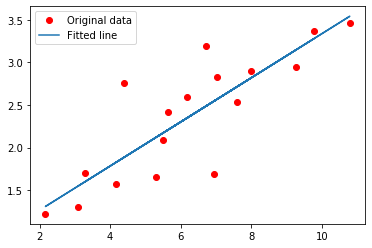

In [33]:
import matplotlib.pyplot as plt

plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

In [5]:
fashion_mnist= keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


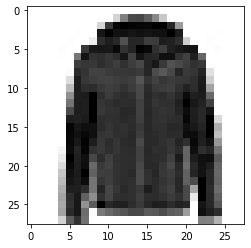

In [6]:
def show_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show()
show_image(x_train[0])

In [7]:
def show_images(n_rows,n_cols,x_data,y_data,class_name):
    assert len(x_data)=len(y_data)
    assert n_rows*n_cols<len(x_data)
    plt.figure(figsize==(n_cols*1.4,n_rows*1.6))
    for row in range(n)

SyntaxError: invalid syntax (<ipython-input-7-19f8f0bfab96>, line 2)

In [ ]:
#-*- coding: utf-8 -*- 
#author: orangleliu date: 2014-11-12 
#python2.7.x ip_scaner.py 
  
''''' 
不同平台，实现对所在内网端的ip扫描 
  
有时候需要知道所在局域网的有效ip，但是又不想找特定的工具来扫描。 
使用方法 python ip_scaner.py 192.168.1.1 
(会扫描192.168.1.1-255的ip) 
'''
  
import platform 
import sys 
import os 
import time 
import _thread
  
def get_os(): 
  ''''' 
  get os 类型 
  '''
  os = platform.system() 
  if os == "Windows": 
    return "n"
  else: 
    return "c"
    
def ping_ip(ip_str): 
  cmd = ["ping", "-{op}".format(op=get_os()), 
      "1", ip_str] 
  output = os.popen(" ".join(cmd)).readlines() 
    
  flag = False
  for line in list(output): 
    if not line: 
      continue
    if str(line).upper().find("TTL") >=0: 
      flag = True
      break
  if flag: 
    print("ip: %s is ok ***"%ip_str)
  
def find_ip(ip_prefix): 
  ''''' 
  给出当前的127.0.0 ，然后扫描整个段所有地址 
  '''
  for i in range(1,256): 
    ip = '%s.%s'%(ip_prefix,i) 
    _thread.start_new_thread(ping_ip, (ip,)) 
    time.sleep(0.3) 
    
if __name__ == "__main__": 
  print("start time %s"%time.ctime())
  commandargs = sys.argv[1:] 
  args = "".join(commandargs)   
    
  ip_prefix = '.'.join(args.split('.')[:-1]) 
  find_ip(ip_prefix) 
  print("end time %s"%time.ctime())

start time Fri Mar 13 22:41:03 2020


In [1]:
# filename: lan_ip_scan.py
import netifaces
import nmap


def get_gateways():
    return netifaces.gateways()['default'][netifaces.AF_INET][0]

def get_ip_lists(gateway):
    ip_lists = []
    for i in range(1, 256):
        ip_lists.append('{}{}'.format(gateway[:-1], i))
    return ip_lists

def scan_ip_survial(ip):
    nmScan = nmap.PortScanner()
    nmScan.scan(hosts=ip, arguments='-sP')
    if nmScan[ip]['hostnames'][0]['name']:
        return {'IP Address:': ip,
                'Hostname:': nmScan[ip]['hostnames'][0]['name']
               }
    else:
        return None

def get_all_survial_hosts():
    survial_hosts = []
    gateway = get_gateways()
    ip_lists = get_ip_lists(gateway)
    for ip in ip_lists:
        scan_rst = scan_ip_survial(ip)
        if scan_rst:
            survial_hosts.append(scan_rst)
            print(scan_rst)
    return survial_hosts


if __name__ == '__main__':
    get_all_survial_hosts()

PortScannerError: 'nmap program was not found in path. PATH is : D:\\learn\\java web\\Java\\jdk1.6.0_24\\bin;E:\\Andiord\\jdk-12.0.1\\bin;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Windows\\System32\\OpenSSH\\;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Program Files (x86)\\Git\\cmd;C:\\Program Files (x86)\\MySQL\\MySQL Fabric 1.5 & MySQL Utilities 1.5\\;C:\\Program Files (x86)\\MySQL\\MySQL Fabric 1.5 & MySQL Utilities 1.5\\Doctrine extensions for PHP\\;C:\\Program Files\\MySQL\\MySQL Server 5.7\\bin;E:\\biancheng\\Dev-cpp5.4.0及API帮助文档\\Dev-Cpp\\MinGW32\\bin;C:\\Program Files (x86)\\Google\\Chrome\\Application;D:\\learn\\aac + h264\\ffmpeg\\bin;D:\\programe;D:\\programe\\Library\\mingw-w64\\bin;D:\\programe\\Library\\usr\\bin;D:\\programe\\Library\\bin;D:\\programe\\Scripts;C:\\Users\\CREATE\\AppData\\Local\\Microsoft\\WindowsApps'

In [101]:
import socket
import platform 
def getip():
    try:
        s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
        s.connect(('www.baidu.com', 0))
        ip = s.getsockname()[0]
    except:
        ip="x.x.x.x"
    finally:
        s.close
    return ip
print(getip())
sysstr = platform.system()
print(sysstr)
ip_address = socket.gethostbyname(socket.gethostname())
print(ip_address)

192.168.1.2
Windows
192.168.137.1


In [159]:
socket.gethostbyname(socket.gethostname())
platform.machine()
platform.node()
platform.platform()
import sys
sys.version_info
platform.platform(aliased = 0,terse = 0)
platform.processor()
platform.uname()
import getpass
getpass.getuser()

'CREATE'

In [187]:
#!/usr/bin/env python3

import os, winreg

def query():
    if os.name != "nt":
        pass
    db = {}
    with winreg.OpenKey(winreg.HKEY_CURRENT_USER, "Software\\FinalWire\\AIDA64\\SensorValues") as key:
        for i in range(winreg.QueryInfoKey(key)[1]):
            name, data, _type = winreg.EnumValue(key, i)
            attr = name.split(".")
            print(attr,winreg.EnumValue(key, i))
            if (attr[0] == "Label"):
                db[attr[1]] = {}
                db[attr[1]]["label"] = data
            else:
                db[attr[1]]["value"] = data
    return db

if __name__ == "__main__":
    db = query()
    print(db)

FileNotFoundError: [WinError 2] 系统找不到指定的文件。

In [195]:
import psutil
print(psutil.cpu_count()) # CPU逻辑数量
print(psutil.cpu_count(logical=False)) # CPU物理核心
psutil.cpu_times()
for x in range(10):
     print(psutil.cpu_percent(interval=1, percpu=True))


12
6
[13.2, 0.0, 1.6, 0.0, 0.0, 0.0, 1.6, 0.0, 9.4, 0.0, 3.1, 0.0]
[32.3, 3.2, 18.8, 30.9, 21.9, 4.7, 12.7, 13.6, 59.1, 6.2, 24.2, 3.1]
[0.0, 0.0, 3.1, 0.0, 0.0, 1.6, 1.6, 0.0, 9.4, 0.0, 3.1, 0.0]
[4.7, 0.0, 0.0, 1.6, 0.0, 0.0, 3.1, 0.0, 7.9, 0.0, 3.1, 0.0]
[4.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.7, 0.0, 3.1, 0.0]
[4.6, 0.0, 1.6, 0.0, 0.0, 0.0, 0.0, 0.0, 6.2, 0.0, 6.2, 0.0]
[10.9, 0.0, 6.2, 3.1, 10.9, 7.8, 10.9, 3.1, 33.8, 1.6, 12.5, 1.5]
[9.2, 1.6, 12.3, 4.7, 7.8, 1.6, 6.2, 6.2, 21.5, 7.8, 10.9, 0.0]
[16.2, 1.5, 3.1, 1.6, 1.6, 1.6, 3.1, 1.6, 14.1, 0.0, 3.1, 0.0]
[9.1, 0.0, 4.7, 1.6, 0.0, 1.6, 1.6, 0.0, 7.8, 0.0, 3.1, 0.0]


In [618]:
import time
import psutil
for i in range(0):#CPU使用率
    time.sleep(0.1)
    x=psutil.cpu_percent()
    print(int(x)*"-",x)

psutil.virtual_memory()
psutil.swap_memory()
psutil.disk_partitions() # 磁盘分区信息
psutil.disk_usage('/').total/1024/1024/1024   #119.22558212280273
psutil.net_io_counters() # 获取网络读写字节／包的个数
psutil.net_if_addrs() # 获取网络接口信息
"""{'以太网': [snicaddr(family=<AddressFamily.AF_LINK: -1>, address='8C-16-45-DC-6F-B3', netmask=None, broadcast=None, ptp=None),
  snicaddr(family=<AddressFamily.AF_INET: 2>, address='169.254.87.41', netmask='255.255.0.0', broadcast=None, ptp=None),
  snicaddr(family=<Address"""
psutil.net_if_stats() # 获取网络接口状态
psutil.net_connections()#addr(ip='127.0.0.1', port=49803)
#sconn(fd=-1, family=<AddressFamily.AF_INET: 2>, type=1, laddr=addr(ip='127.0.0.1', port=56915), raddr=addr(ip='127.0.0.1', port=56916), status='ESTABLISHED', pid=7848),
psutil.pids() # 所有进程ID
p = psutil.Process(17080)
p.name()#'System Idle Process'
p.exe()#'C:\\Program Files (x86)\\Google\\Chrome\\Application\\chrome.exe'
p.cwd()#'C:\\Program Files (x86)\\Google\\Chrome\\Application\\80.0.3987.132'
p.cmdline()
p.ppid() 
p.parent() #psutil.Process(pid=6764, name='jupyter-notebook.exe', started='21:48:06')
p.num_threads()
p.environ()#程序环境变量
p.terminate() # 结束进程
psutil.test()

USER         PID  %MEM     VSZ     RSS  NICE STATUS  START   TIME  CMDLINE
SYSTEM         0   0.0   56.0K    8.0K        runni  Mar13  11:50  Syste
SYSTEM         4   0.0  192.0K  132.0K        runni  Mar13  05:43  Syste
             112   0.1    6.7M   16.8M        runni  Mar13  00:05  lsass
             120   0.1    6.4M   10.5M        runni  Mar13  00:00  conho
             144   0.5  796.0K   83.2M        runni  Mar13  00:00  Regis
CREATE       352   0.0    1.7M    7.8M    32  runni  Mar13  00:00  C:\Wi
             500   0.0  476.0K    1.1M        runni  Mar13  00:00  smss.
             772   0.1    2.9M   11.5M        runni  Mar13  00:00  winlo
             836   0.0    1.9M    5.4M        runni  Mar13  00:01  csrss
             936   0.0    1.4M    6.8M        runni  Mar13  00:00  winin
             944   0.0    2.7M    6.7M        runni  Mar13  00:12  csrss
            1008   0.1    5.6M   10.5M        runni  Mar13  35:05  servi
            1036   0.0 1004.0K    3.9M        run

            8180   0.1    4.7M   17.9M        runni  Mar13  00:01  svcho
CREATE      8212   1.4  348.8M  232.8M    32  runni  Mar13  04:07  C:\Wi
CREATE      8316   0.1    6.4M   22.3M    32  runni  Mar13  00:02  C:\Wi
CREATE      8356   1.3  139.2M  215.3M    32  runni  Mar13  04:12  C:\Pr
CREATE      8372   0.7   51.1M  114.8M    32  runni  Mar13  00:22  C:\Wi
            8476   0.0    1.9M    7.0M        runni  Mar13  00:00  svcho
            8508   0.0    1.6M    1.1M        runni  Mar13  00:00  Googl
            8516   0.0    1.7M    1.1M        runni  Mar13  00:00  Googl
            8640   0.0  864.0K    3.8M        runni  Mar13  00:00  dasHo
CREATE      8664   0.9  113.3M  142.8M    32  runni  Mar13  03:47  C:\Pr
CREATE      8684   0.1    6.3M   16.8M    32  runni  00:26  00:00  C:\Pr
            8728   0.1    2.6M   10.4M        runni  Mar13  00:00  svcho
CREATE      8732   0.3   27.2M   50.9M    64  runni  Mar13  00:04  C:\Pr
CREATE      8756   0.1    3.0M   17.1M    32  runni

In [637]:
import requests
import chardet
url="http://192.168.1.1"
url1="https://www.cnblogs.com/xcfree/p/5045415.html"
re=requests.get(url1)
print(re.encoding)
chardet.detect(re.content)


utf-8


{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [639]:
from __future__ import division
import os
from collections import namedtuple
_nt_cpu_temp = namedtuple('cputemp', 'name temp max critical')
def get_cpu_temp(fahrenheit=False):
"""Return temperatures expressed in Celsius for each physical CPU
installed on the system as a list of namedtuples as in:
>>> get_cpu_temp()
[cputemp(name='atk0110', temp=32.0, max=60.0, critical=95.0)]
"""
    # http://www.mjmwired.net/kernel/Documentation/hwmon/sysfs-interface
    cat = lambda file: open(file, 'r').read().strip()
    base = '/sys/class/hwmon/'
    ls = sorted(os.listdir(base))
    assert ls, "%r is empty" % base
    ret = []
    for hwmon in ls:
    hwmon = os.path.join(base, hwmon)
    label = cat(os.path.join(hwmon, 'temp1_label'))
    assert 'cpu temp' in label.lower(), label
    name = cat(os.path.join(hwmon, 'name'))
    temp = int(cat(os.path.join(hwmon, 'temp1_input'))) / 1000
    max_ = int(cat(os.path.join(hwmon, 'temp1_max'))) / 1000
    crit = int(cat(os.path.join(hwmon, 'temp1_crit'))) / 1000
    digits = (temp, max_, crit)
    if fahrenheit:
        digits = [(x * 1.8) + 32 for x in digits]
        ret.append(_nt_cpu_temp(name, *digits))
    return ret
get_cpu_temp()

IndentationError: expected an indented block (<ipython-input-639-ce81cf2434e1>, line 10)

In [ ]:
#python
for da in range(0,35):
    for zh in range(0,51):
        for xi in range(0,101):
            if da*3+zh*2+xi*1==100:
                print(da,zh,xi)
      